# Sales Prediction and Forecasting 
Using Machine Learning Models:

1.Seasonal Naive Model

2.Holt Winter Triple Exponential Smoothing Model
  
3.ARMIA Model: Autoregressive Integrated Moving Average

4.Supervisied Machine Learning:Linear Regression Model

5.Random Forest Model


### Exploring the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import calendar
from scipy import stats

In [2]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [3]:
#for exponentional model
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
#for ARMIA model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
#for Linearregression model
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

In [6]:
#for Randomforest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sale=pd.read_csv('sample_submission.csv')

In [8]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [9]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


### Cleaning the data

###### null value analysis


In [10]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [11]:
test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

### Data preprocessing

In [12]:
# Combine train and test data into a single DataFrame
whole = train
print(train)

              date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]


In [13]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')  # convert date column to datetime object
train['year'] = train['date'].dt.year  

test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')  # convert date column to datetime object
test['year'] = test['date'].dt.year
print(test['year'])


0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
44995    2018
44996    2018
44997    2018
44998    2018
44999    2018
Name: year, Length: 45000, dtype: int64


In [14]:
train = train[(train['store'] == 1) & (train['item'] == 1)]
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')  
train['year'] = train['date'].dt.year  
train['month'] = train['date'].dt.month  
train['day'] = train['date'].dt.day  
train['weekday'] = train['date'].dt.weekday  
train['weekday'] = np.where(train.weekday == 0, 7, train.weekday)  


In [15]:
train.head()


,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


In [16]:
test = test[(test['store'] == 1) & (test['item'] == 1)]
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')  # convert date column to datetime object
test['year'] = test['date'].dt.year 
test['month'] = test['date'].dt.month  
test['day'] = test['date'].dt.day
test['weekday'] = test['date'].dt.weekday  
test['weekday'] = np.where(test.weekday == 0, 7, test.weekday)

In [17]:
test.head()

,id,date,store,item,year,month,day,weekday
0,0,2018-01-01,1,1,2018,1,1,7
1,1,2018-01-02,1,1,2018,1,2,1
2,2,2018-01-03,1,1,2018,1,3,2
3,3,2018-01-04,1,1,2018,1,4,3
4,4,2018-01-05,1,1,2018,1,5,4


In [18]:
temp = train.set_index('date')
train= temp.loc[:'2017-09-30'].reset_index(drop=False)
test = temp.loc['2017-10-01':].reset_index(drop=False)


In [19]:
train.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


In [20]:
test.head()

,date,store,item,sales,year,month,day,weekday
0,2017-10-01,1,1,21,2017,10,1,6
1,2017-10-02,1,1,12,2017,10,2,7
2,2017-10-03,1,1,18,2017,10,3,1
3,2017-10-04,1,1,15,2017,10,4,2
4,2017-10-05,1,1,20,2017,10,5,3


### Visulaization

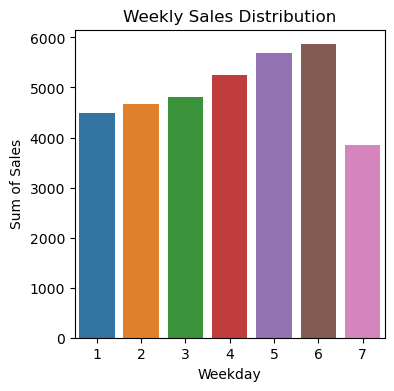

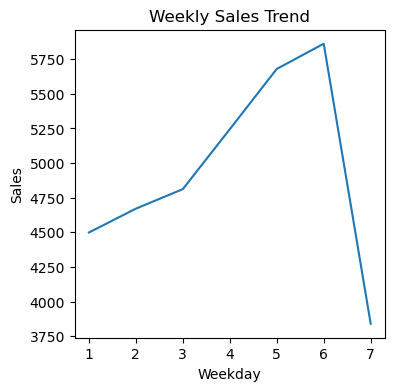

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by weekday and calculating the sum of sales for each weekday
weekday_agg = train.groupby('weekday')['sales'].sum().reset_index()
# Creating the bar graph for weekday sales distribution
plt.figure(figsize=(4, 4))
sns.barplot(x='weekday', y='sales', data=weekday_agg)
plt.xlabel('Weekday')
plt.ylabel('Sum of Sales')
plt.title('Weekly Sales Distribution')
plt.show()
# Creating the line plot for weekly sales trend
plt.figure(figsize=(4, 4))
sns.lineplot(x='weekday', y='sales', data=weekday_agg)
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.title('Weekly Sales Trend')
plt.show()


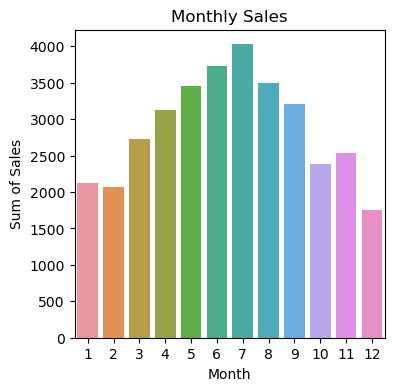

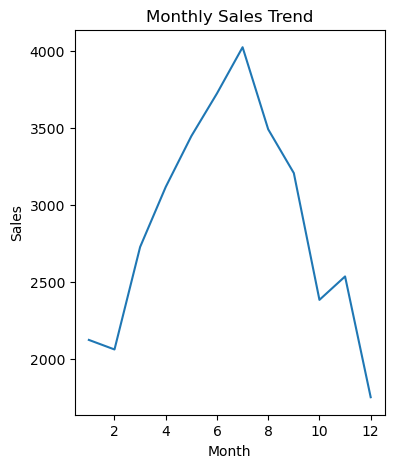

In [22]:
# Grouping data by month and calculating the sum of sales for each month
monthly_agg = train.groupby('month')['sales'].sum().reset_index()

# Creating the bar graph
plt.figure(figsize=(4, 4))
sns.barplot(x='month', y='sales', data=monthly_agg)
plt.xlabel('Month')
plt.ylabel('Sum of Sales')
plt.title('Monthly Sales')
plt.show()

# Creating the line plot
plt.figure(figsize=(4, 5))
sns.lineplot(x='month', y='sales', data=monthly_agg)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()



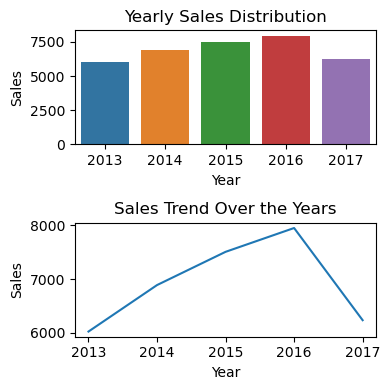

In [23]:
# Grouping data by year and calculating the sum of sales for each year
yearly_agg = train.groupby('year')['sales'].sum().reset_index()
# Creating a figure with two subplots
fig, axs = plt.subplots(nrows=2, figsize=(4, 4))
# Bar graph for yearly sales distribution
sns.barplot(x='year', y='sales', data=yearly_agg, ax=axs[0])
axs[0].set_title('Yearly Sales Distribution')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Sales')
# Line plot for sales trend over the years
sns.lineplot(x='year', y='sales', data=yearly_agg, ax=axs[1])
axs[1].set_title('Sales Trend Over the Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()


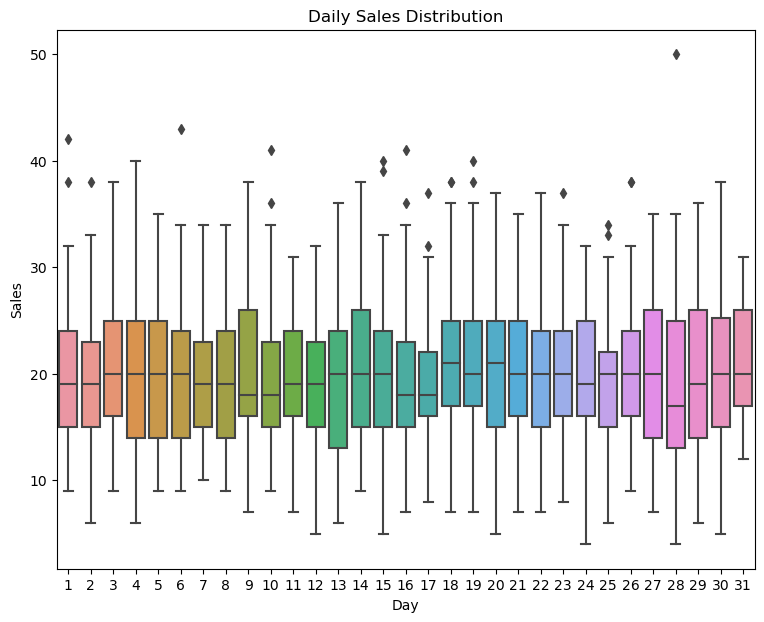

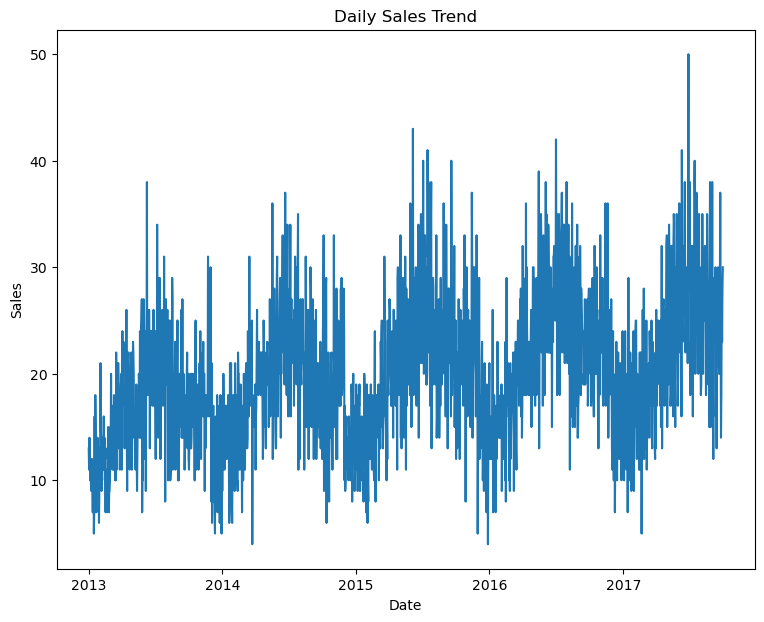

In [24]:
# Extracting the day from the date
train['day'] = train['date'].dt.day

# Grouping data by date and calculating the sum of sales for each date
daily_agg = train.groupby('date')['sales'].sum().reset_index()

# Creating the bar graph for daily sales distribution
plt.figure(figsize=(9, 7))
sns.boxplot(x='day', y='sales', data=train)
plt.title('Daily Sales Distribution')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

# Creating the line plot for daily sales trend
plt.figure(figsize=(9, 7))
sns.lineplot(x='date', y='sales', data=daily_agg)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()




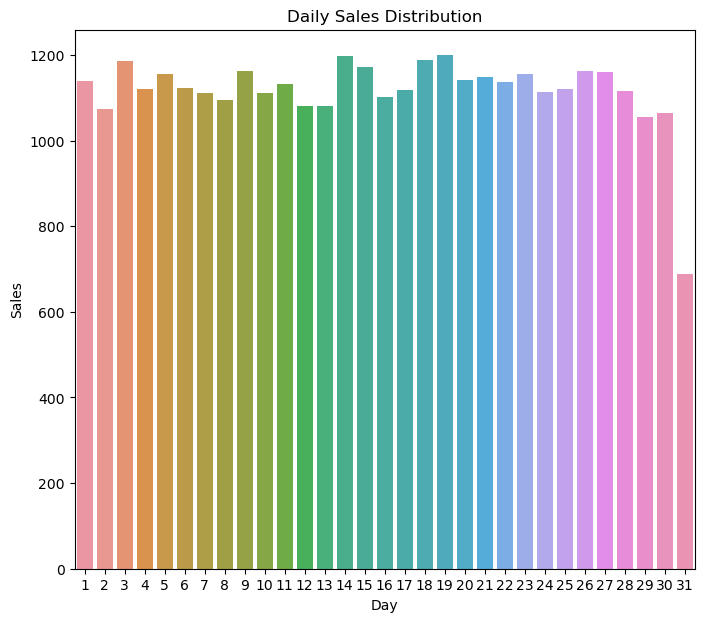

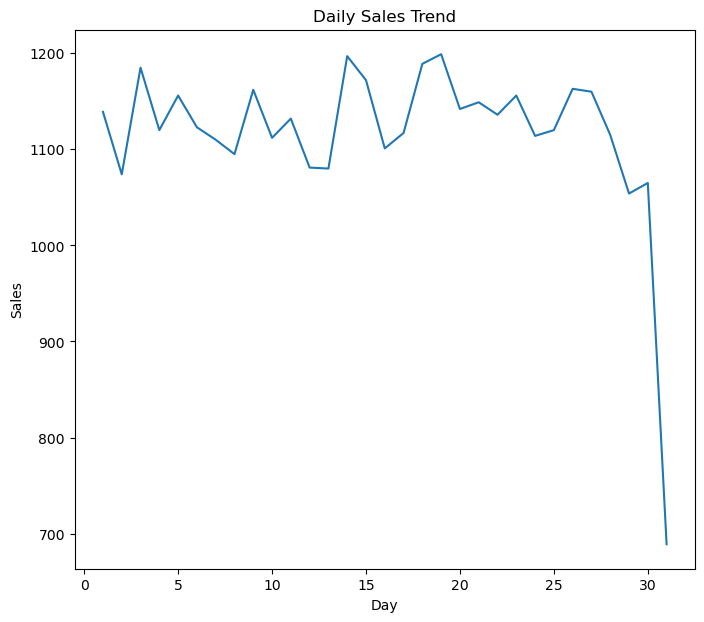

In [25]:
# Extracting the day from the date
train['day'] = train['date'].dt.day

# Grouping data by day and calculating the sum of sales for each day
daily_agg = train.groupby('day')['sales'].sum().reset_index()

# Creating the bar graph for daily sales distribution
plt.figure(figsize=(8, 7))
sns.barplot(x='day', y='sales', data=daily_agg)
plt.title('Daily Sales Distribution')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

# Creating the line plot for daily sales trend
plt.figure(figsize=(8, 7))
sns.lineplot(x='day', y='sales', data=daily_agg)
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()


## 1. Seasonal Naive Model

In [26]:
# subtract 1 year from test data
dates = (test['date'] - np.timedelta64(1, 'Y') +  np.timedelta64(1, 'D')).values.astype('datetime64[D]') 
seasonal_naive_sales = train[train['date'].astype('datetime64[D]').isin(dates)]['sales'] 
# make a copy of the test_df and make naive predictions for the last 3 months of 2017
sn_pred_df = test.copy().drop('sales', axis=1)
sn_pred_df['seasonal_naive_sales'] = pd.DataFrame(seasonal_naive_sales).set_index(test.index)
sn_pred_df.head()
forecast_dates = pd.date_range(start='2018-01-01', end='2020-01-01', freq='D')
forecast_df = pd.DataFrame(index=forecast_dates, columns=['seasonal_naive_sales'])
forecast_df['seasonal_naive_sales'] = seasonal_naive_sales.mean()

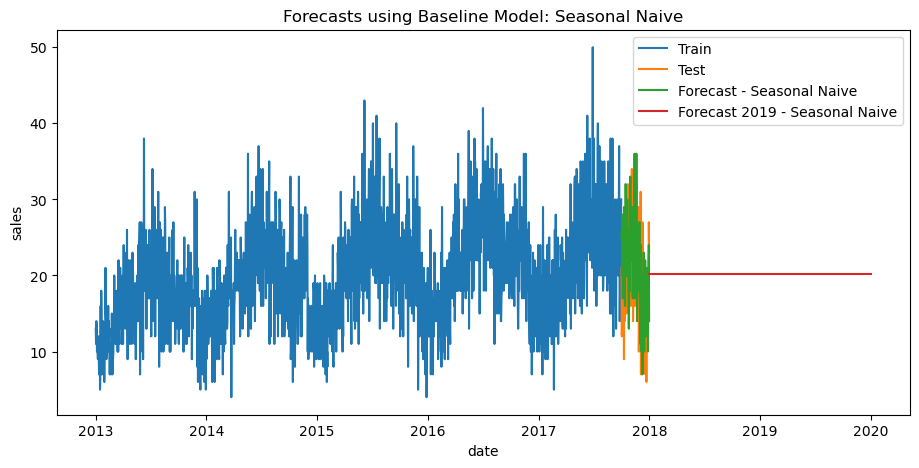

In [27]:
plt.figure(figsize=(11,5))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(sn_pred_df['date'], sn_pred_df['seasonal_naive_sales'], label='Forecast - Seasonal Naive')
plt.plot(forecast_df.index, forecast_df['seasonal_naive_sales'], label='Forecast 2019 - Seasonal Naive')
plt.legend(loc='best')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Baseline Model: Seasonal Naive')
plt.show()

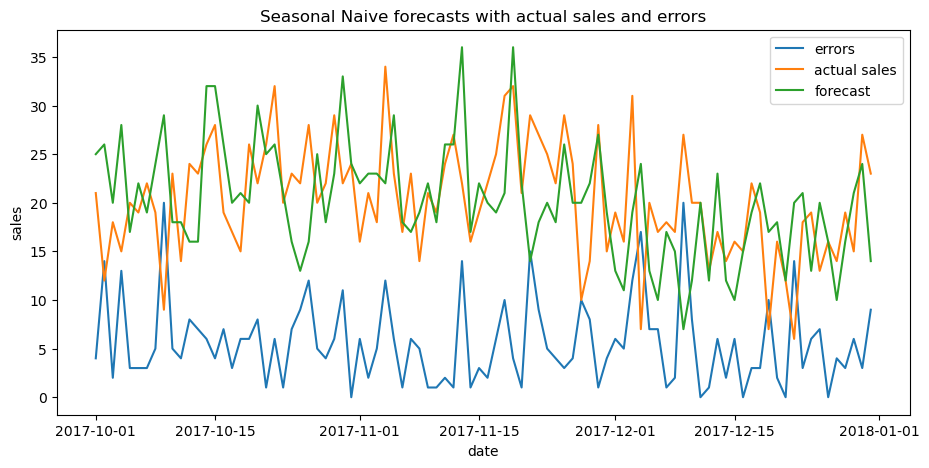

,total_sales,total_sn_pred_sales,overall_error,MAE,RMSE,MAPE
model,,,,,,
Seasonal Naive,1861,1857,4,5.630435,7.130766,27.834498


In [28]:
errors_df = pd.merge(test, sn_pred_df, on='date')
errors_df = errors_df[['date', 'sales', 'seasonal_naive_sales']]
errors_df = pd.merge(test, sn_pred_df, on='date')
errors_df = errors_df[['date', 'sales', 'seasonal_naive_sales']]
errors_df['errors'] = test['sales'] - sn_pred_df['seasonal_naive_sales']
errors_df.insert(0, 'model', 'Seasonal Naive') 

def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, sales=errors_df['sales']):
    return np.sum(np.abs(err))/np.sum(sales) * 100

result_df = errors_df.groupby('model').agg(total_sales=('sales', 'sum'),
                                           total_sn_pred_sales=('seasonal_naive_sales', 'sum'),
                                           overall_error=('errors', 'sum'),
                                           MAE=('errors', mae), 
                                           RMSE=('errors', rmse), 
                                           MAPE=('errors', mape))
plt.figure(figsize=(11,5))
plt.plot(errors_df['date'], np.abs(errors_df['errors']), label='errors')
plt.plot(errors_df['date'], errors_df['sales'], label='actual sales')
plt.plot(errors_df['date'], errors_df['seasonal_naive_sales'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Seasonal Naive forecasts with actual sales and errors')
plt.show()

result_df

###### TimeSeries Decomposition 

In [29]:
ts_decomp_df = train.set_index('date') # set date as index
ts_decomp_df['sales'] = ts_decomp_df['sales'].astype(float)
ts_decomp_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


<Figure size 640x480 with 0 Axes>

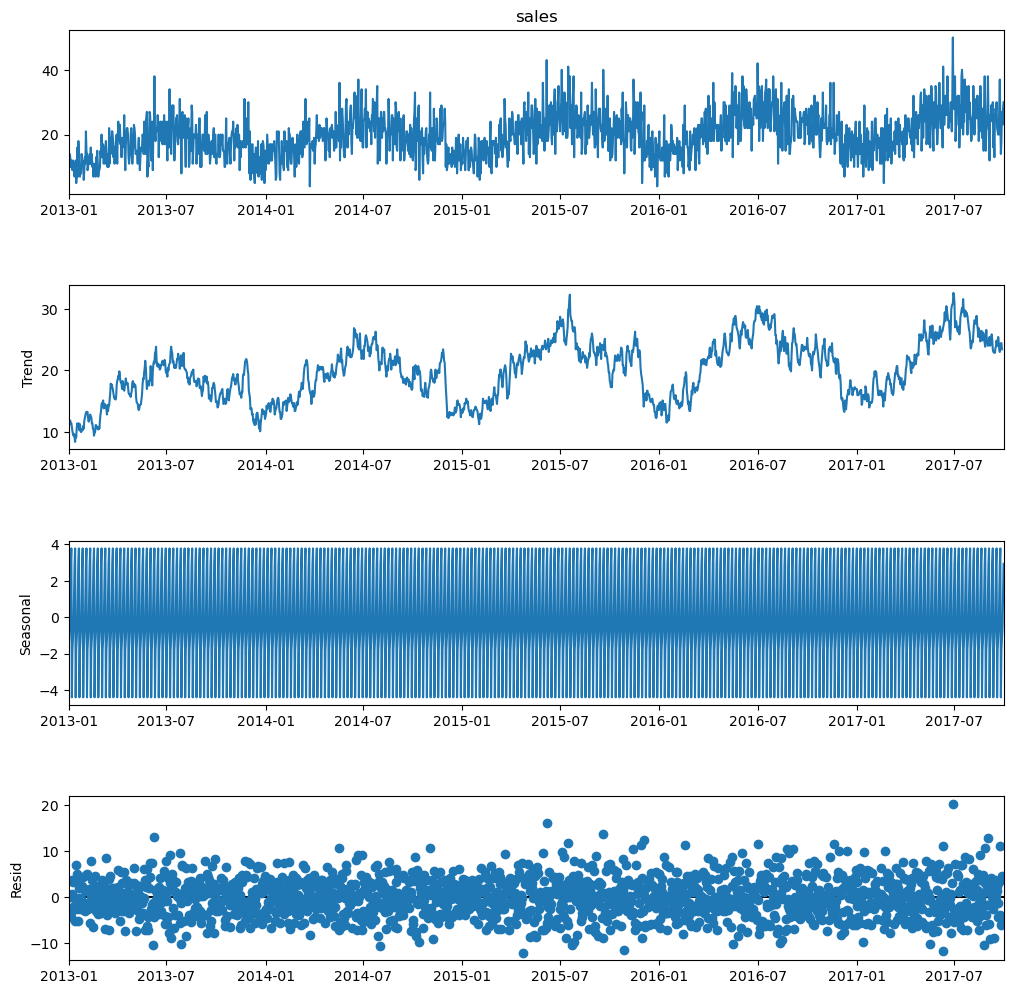

In [30]:
# Perform seasonal decomposition
result = seasonal_decompose(ts_decomp_df['sales'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(11, 11)
plt.show()


## 2.Holt Winter Triple Exponential Smoothing Model

In [31]:
import warnings
warnings.filterwarnings('ignore')
hw_train_df = train[['date', 'sales']].set_index('date')
hw_test_df = test[['date', 'sales']].set_index('date')
# Model 1: Triple Exponential Smoothing without damping
hw_model_1 = ExponentialSmoothing(hw_train_df, trend='add', seasonal='add', seasonal_periods=12, initialization_method="estimated")
hw_fit_1 = hw_model_1.fit()
pred_fit_1 = pd.Series(hw_fit_1.predict(start=hw_test_df.index[0], end=hw_test_df.index[-1]), 
                       name='pred_sales').reset_index()

# Model 2: Triple Exponential Smoothing with damping
hw_model_2 = ExponentialSmoothing(hw_train_df, trend='add', seasonal='add', seasonal_periods=12, damped=True, use_boxcox=False)
hw_fit_2 = hw_model_2.fit(remove_bias=False)
pred_fit_2 = pd.Series(hw_fit_2.predict(start=hw_test_df.index[0], end=hw_test_df.index[-1]), 
                       name='pred_sales').reset_index()
start_date_2018 = '2018-01-01'
end_date_2019 = '2020-01-01'
forecast_2019_1 = hw_fit_1.predict(start=start_date_2018, end=end_date_2019)
forecast_2019_2 = hw_fit_2.predict(start=start_date_2018, end=end_date_2019)
print('Forecasts made, ready for evaluation')

Forecasts made, ready for evaluation


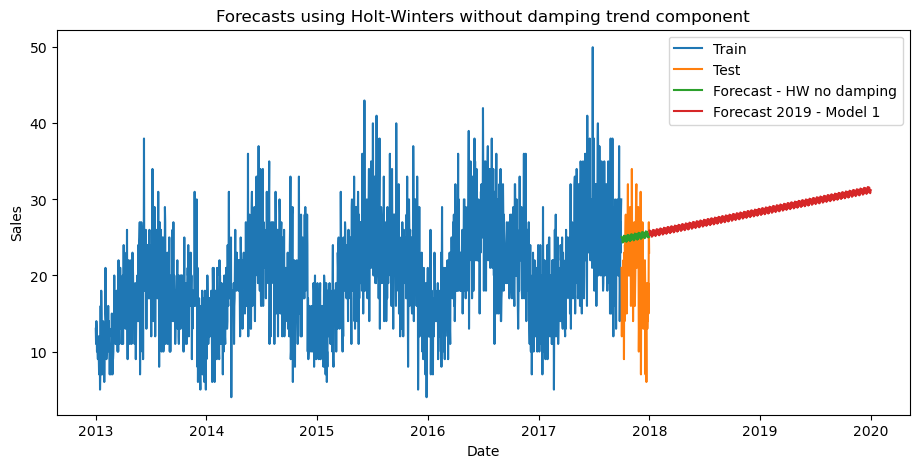

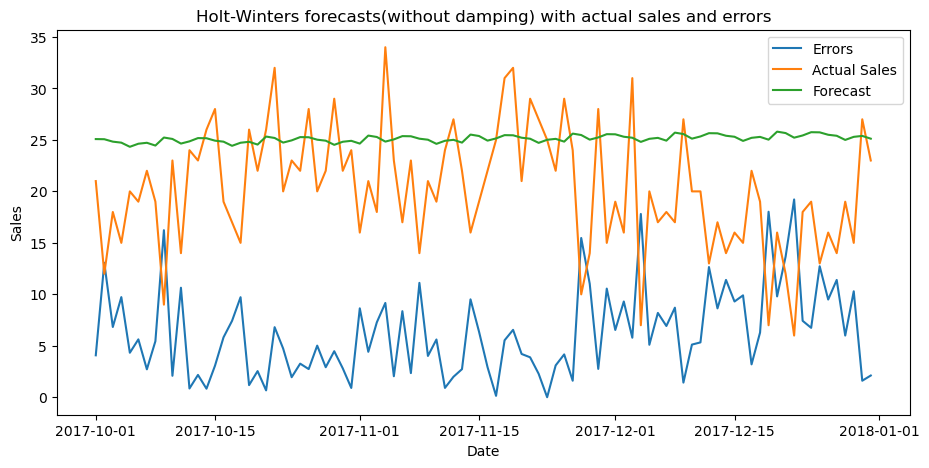

,total_sales,total_pred_sales,holt_winters_overall_error,MAE,RMSE,MAPE
model,,,,,,
Holt-Winters,1861,2310.834517,-449.834517,6.302484,7.644371,31.156824


In [32]:
# Merge predictions and actual sales into one df
errors_df_hw = pd.merge(test, pred_fit_1, left_on='date', right_on='index')
errors_df_hw = errors_df_hw[['date', 'sales', 'pred_sales']]
errors_df_hw['errors'] = errors_df_hw.sales - errors_df_hw.pred_sales
errors_df_hw.insert(0, 'model', 'Holt-Winters')
# Plot forecasts and actual sales
plt.figure(figsize=(11, 5))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_sales'], label='Forecast - HW no damping')
plt.plot(forecast_2019_1.index, forecast_2019_1, label='Forecast 2019 - Model 1')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasts using Holt-Winters without damping trend component')
plt.show()
# Plot forecasts, actual sales, and errors
plt.figure(figsize=(11, 5))
plt.plot(errors_df_hw['date'], np.abs(errors_df_hw['errors']), label='Errors')
plt.plot(errors_df_hw['date'], errors_df_hw['sales'], label='Actual Sales')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_sales'], label='Forecast')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Holt-Winters forecasts(without damping) with actual sales and errors')
plt.show()

result_df_hw = errors_df_hw.groupby('model').agg(total_sales=('sales', 'sum'),
                                          total_pred_sales=('pred_sales', 'sum'),
                                          holt_winters_overall_error=('errors', 'sum'),
                                          MAE=('errors', mae),
                                          RMSE=('errors', rmse), 
                                          MAPE=('errors', mape))
result_df_hw


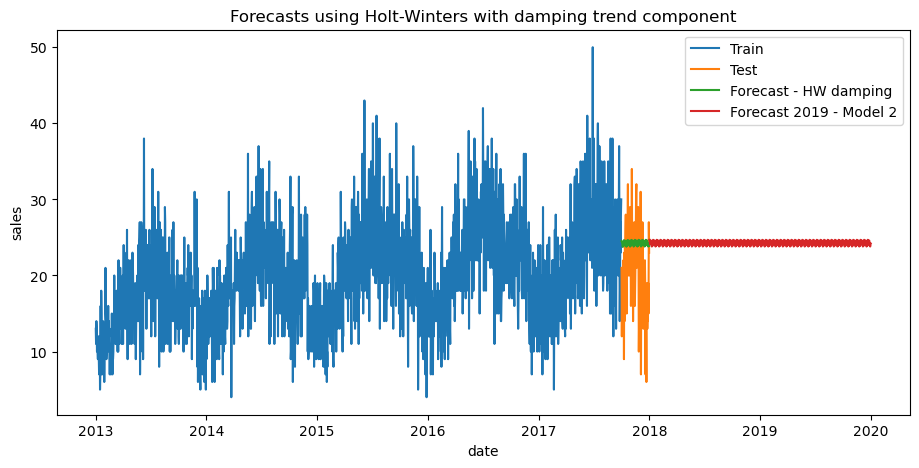

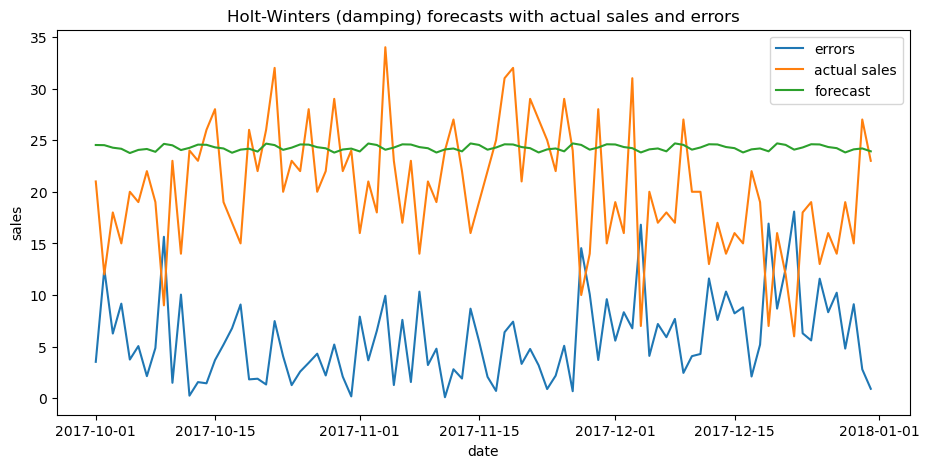

,total_sales,total_pred_sales,holt_winters_overall_error,MAE,RMSE,MAPE
model,,,,,,
Holt-Winters-Damped,1861,2232.198699,-371.198699,5.804361,7.085689,28.694314


In [33]:
# Merge predictions and actual sales into one df
errors_df_hwd = pd.merge(test, pred_fit_2, left_on='date', right_on='index')
errors_df_hwd = errors_df_hwd[['date', 'sales','pred_sales']]
errors_df_hwd['errors'] = errors_df_hwd.sales - errors_df_hwd.pred_sales
errors_df_hwd.insert(0, 'model', 'Holt-Winters-Damped') 

# Evaluate the predictions for Holt-Winters without damping trend component
plt.figure(figsize=(11,5))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(errors_df_hwd['date'], errors_df_hwd['pred_sales'], label='Forecast - HW damping')
plt.plot(forecast_2019_2.index, forecast_2019_2, label='Forecast 2019 - Model 2')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.show()

plt.figure(figsize=(11,5))
plt.plot(errors_df_hwd['date'], np.abs(errors_df_hwd['errors']), label='errors')
plt.plot(errors_df_hwd['date'], errors_df_hwd['sales'], label='actual sales')
plt.plot(errors_df_hwd['date'], errors_df_hwd['pred_sales'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Holt-Winters (damping) forecasts with actual sales and errors')
plt.show()

result_df_hwd = errors_df_hwd.groupby('model').agg(total_sales=('sales', 'sum'),
                                          total_pred_sales=('pred_sales', 'sum'),
                                          holt_winters_overall_error=('errors', 'sum'),
                                          MAE=('errors', mae),
                                          RMSE=('errors', rmse), 
                                          MAPE=('errors', mape))
result_df_hwd

## 3. ARMIA Model: Autoregressive Integrated Moving Average 

###### stationarity

In [34]:
arima_df = train[['date', 'sales']].set_index('date')
arima_test_df = test[['date', 'sales']].set_index('date')

def test_stationarity(timeseries):
    # Plotting rolling statistics
    rollmean = timeseries.rolling(window=365).mean()
    rollstd = timeseries.rolling(window=365).std()
    adfuller_test = adfuller(timeseries, autolag='AIC')
    print("Test statistic = {:.3f}".format(adfuller_test[0]))
    print("P-value = {:.3f}".format(adfuller_test[1]))
    print("Critical values :")
    
    for key, value in adfuller_test[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence"
              .format(key, value, '' if adfuller_test[0] < value else 'not', 100-int(key[:-1])))
test_stationarity(arima_df.sales)


Test statistic = -2.937
P-value = 0.041
Critical values :
	1%: -3.434179908502461 - The data is not stationary with 99% confidence
	5%: -2.863231689892687 - The data is  stationary with 95% confidence
	10%: -2.567670609760268 - The data is  stationary with 90% confidence


###### Differencing

In [35]:
first_difference = arima_df.sales - arima_df.sales.shift(1)
first_difference = pd.DataFrame(first_difference.dropna(inplace=False))
# Check for stationarity after differencing
test_stationarity(first_difference.sales)

Test statistic = -12.326
P-value = 0.000
Critical values :
	1%: -3.434179908502461 - The data is  stationary with 99% confidence
	5%: -2.863231689892687 - The data is  stationary with 95% confidence
	10%: -2.567670609760268 - The data is  stationary with 90% confidence


###### Model 

In [36]:
print(arima_df.shape)
# Remove any rows with missing values
arima_df = arima_df.dropna()
# Extract the endogenous variable
endog = arima_df['sales']
print(len(endog))
# Fit the ARIMA model
arima_model = ARIMA(endog, order=(6, 1, 1)).fit()
print(arima_model.summary())


(1734, 1)
1734
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1734
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -5306.648
Date:                Tue, 23 May 2023   AIC                          10629.296
Time:                        17:37:36   BIC                          10672.957
Sample:                    01-01-2013   HQIC                         10645.443
                         - 09-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6039      0.051    -11.899      0.000      -0.703      -0.504
ar.L2         -0.6032      0.040    -15.019      0.000      -0.682      -0.524
ar.L3         -0.5652      0.037    -

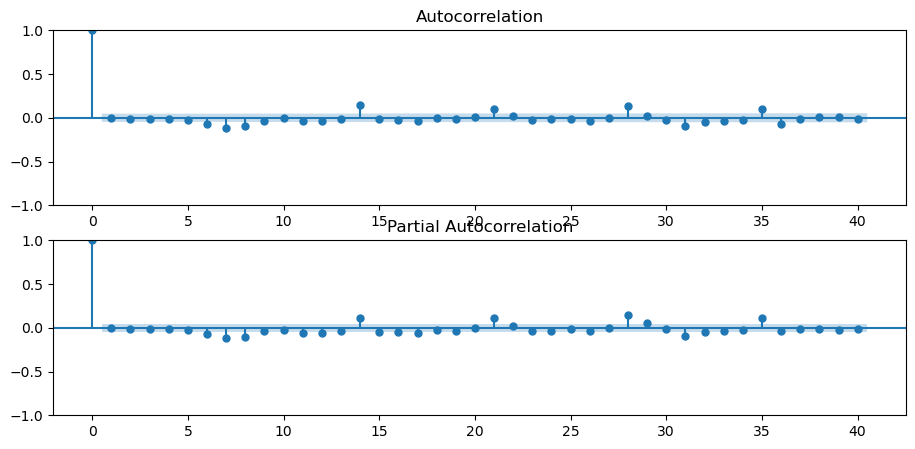

In [37]:
residuals = arima_model.resid
# Checking for seasonality
fig, ax = plt.subplots(2, figsize=(11,5))
ax[0] = plot_acf(residuals, ax=ax[0], lags=40)
ax[1] = plot_pacf(residuals, ax=ax[1], lags=40)

In [38]:
# fit the model
sarima_model = SARIMAX(arima_df.sales, order=(6, 1, 0), seasonal_order=(6, 1, 0, 7), 
                       enforce_invertibility=False, enforce_stationarity=False)
sarima_fit = sarima_model.fit()
arima_test_df['pred_sales'] = sarima_fit.predict(start=arima_test_df.index[0],
                                                 end=arima_test_df.index[-1], dynamic= True)

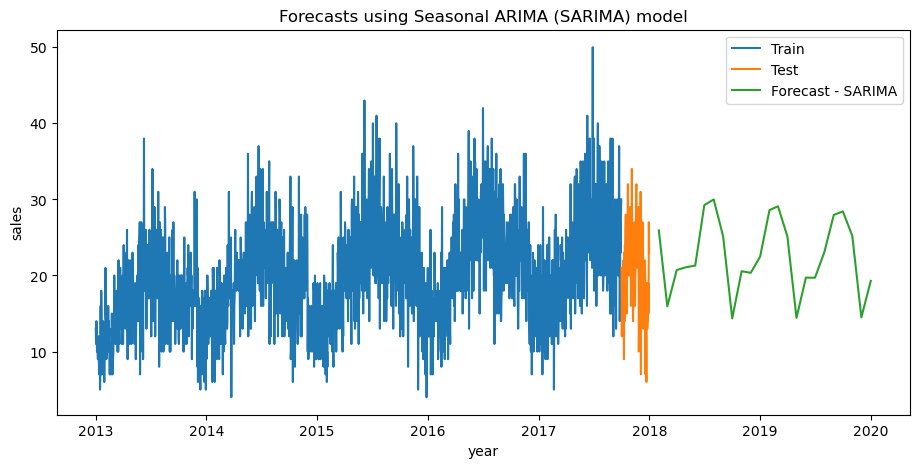

In [39]:
# Fit the SARIMA model
sarima_model = SARIMAX(arima_df.sales, order=(6, 1, 0), seasonal_order=(6, 1, 0, 7), 
                       enforce_invertibility=False, enforce_stationarity=False)
sarima_fit = sarima_model.fit()

# Generate the forecast for the next two years
forecast = sarima_fit.get_forecast(steps=24)

# Extract the forecasted sales and dates
forecasted_sales = forecast.predicted_mean
forecast_dates = pd.date_range(start=arima_test_df.index[-1] + pd.DateOffset(months=1), 
                              periods=24, freq='MS')

# Create a DataFrame for the forecasted sales
forecast_df = pd.DataFrame({'date': forecast_dates, 'pred_sales': forecasted_sales})
# eval
arima_test_df['errors'] = arima_test_df.sales - arima_test_df.pred_sales
arima_test_df.insert(0, 'model', 'SARIMA')

# Plot the forecasted sales
plt.figure(figsize=(11, 5))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(forecast_df['date'], forecast_df['pred_sales'], label='Forecast - SARIMA')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Forecasts using Seasonal ARIMA (SARIMA) model')
plt.show()

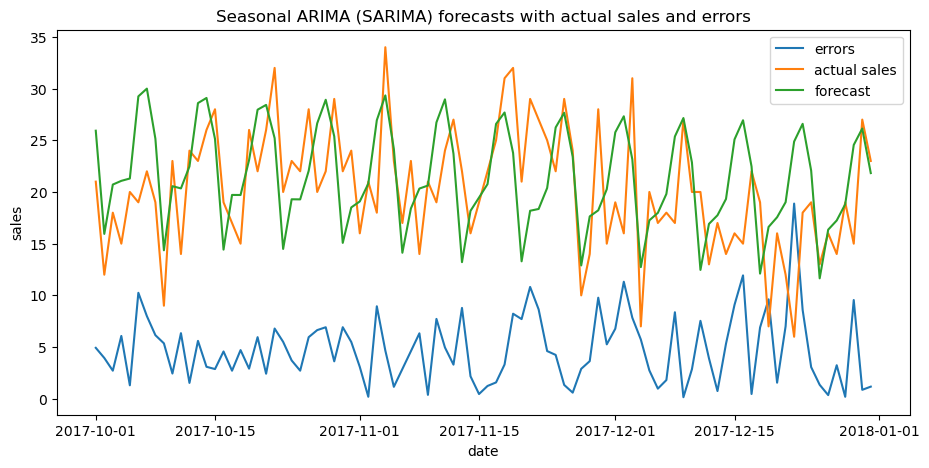

,total_sales,total_pred_sales,SARIMA_overall_error,MAE,RMSE,MAPE
model,,,,,,
SARIMA,1861,1973.197449,-112.197449,4.799933,5.839147,23.728846


In [40]:

plt.figure(figsize=(11,5))
plt.plot(arima_test_df.index, np.abs(arima_test_df['errors']), label='errors')
plt.plot(arima_test_df.index, arima_test_df['sales'], label='actual sales')
plt.plot(arima_test_df.index, arima_test_df['pred_sales'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Seasonal ARIMA (SARIMA) forecasts with actual sales and errors')
plt.show()

result_df_sarima = arima_test_df.groupby('model').agg(total_sales=('sales', 'sum'),
                                          total_pred_sales=('pred_sales', 'sum'),
                                          SARIMA_overall_error=('errors', 'sum'),
                                          MAE=('errors', mae),
                                          RMSE=('errors', rmse), 
                                          MAPE=('errors', mape))
result_df_sarima

## 4.Supervisied Machine Learning:Linear Regression Model

In [41]:
whole = pd.concat([train, test], ignore_index=True)
temp= whole
temp

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14,2017,12,27,2
1822,2017-12-28,1,1,19,2017,12,28,3
1823,2017-12-29,1,1,15,2017,12,29,4
1824,2017-12-30,1,1,27,2017,12,30,5


#### Feature Engineering

In [42]:
# Lag features
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    temp[lag_i] = temp.sales.shift(i)

# Rolling window
temp['rolling_mean'] = temp.sales.rolling(window=7).mean()
temp['rolling_max'] = temp.sales.rolling(window=7).max()
temp['rolling_min'] = temp.sales.rolling(window=7).min()

temp = temp.dropna(how='any', inplace=False)
temp = temp.drop(['store', 'item'], axis=1)

# Split the series to predict the last 3 months of 2017
temp = temp.set_index('date')
reg_train_df = temp.loc[:'2017-09-30']
reg_test_df = temp.loc['2017-10-01':]                
reg_test_df = temp.loc['2017-10-01':]

#### Model Building

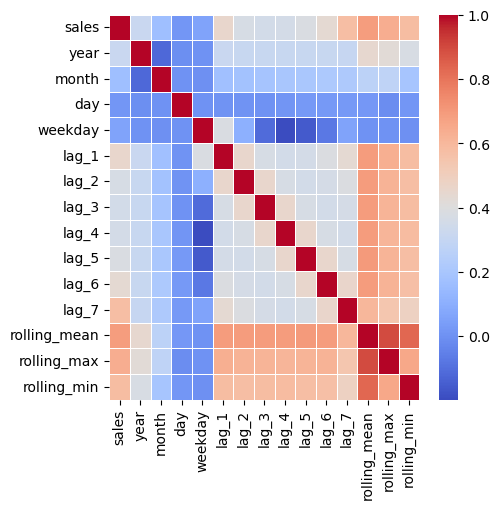

In [43]:
corr = reg_train_df.corr()
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr, linewidths=0.5, cmap='coolwarm')
plt.show()


In [44]:
X_train = reg_train_df.drop(['sales'], axis=1)
y_train = reg_train_df['sales'].values

X_test = reg_test_df.drop(['sales'], axis=1)
y_test = reg_test_df['sales'].values

#Univariate SelectKBest class to extract top 5 best features
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature','Score']  # naming the dataframe columns
print(feature_scores.nlargest(5,'Score')) 

         Feature        Score
11  rolling_mean  1577.946956
12   rolling_max  1170.464035
13   rolling_min   888.451268
10         lag_7   860.565955
4          lag_1   449.743115


In [45]:
# update X_train, X_test to include top features
X_train = X_train[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_1']]
X_test = X_test[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_1']]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = reg_test_df[['sales']]
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
errors_df.insert(0, 'model', 'LinearRegression')

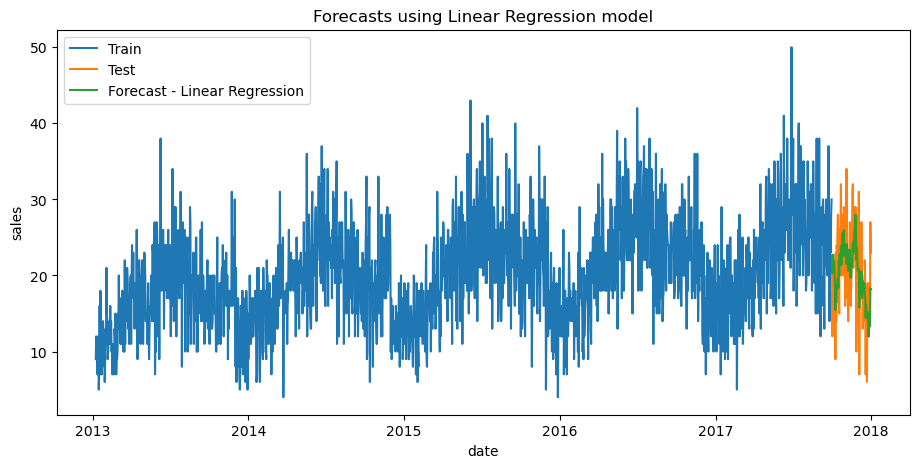

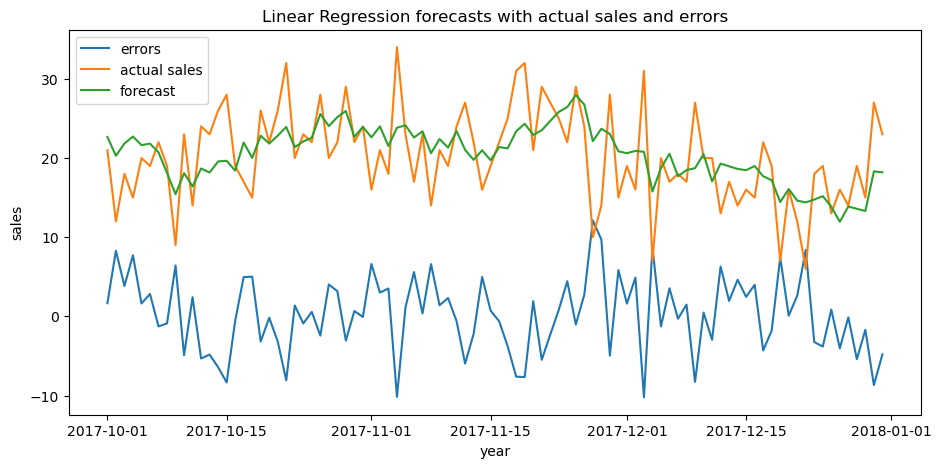

,total_sales,total_pred_sales,LR_overall_error,MAE,RMSE,MAPE
model,,,,,,
LinearRegression,1861,1882.074831,21.074831,3.858646,4.786183,19.075519


In [46]:
fig = plt.figure(figsize=(11,5))
plt.plot(reg_train_df.index, reg_train_df['sales'], label='Train')
plt.plot(reg_test_df.index, reg_test_df['sales'], label='Test')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Linear Regression model')
plt.show()

fig = plt.figure(figsize=(11,5))
plt.plot(errors_df.index, errors_df.errors, label='errors')
plt.plot(errors_df.index, errors_df.sales, label='actual sales')
plt.plot(errors_df.index, errors_df.pred_sales, label='forecast')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Linear Regression forecasts with actual sales and errors')
plt.show()

result_df_lr = errors_df.groupby('model').agg(total_sales=('sales', 'sum'),
                                          total_pred_sales=('pred_sales', 'sum'),
                                          LR_overall_error=('errors', 'sum'),
                                          MAE=('errors', mae),
                                          RMSE=('errors', rmse), 
                                          MAPE=('errors', mape))
result_df_lr


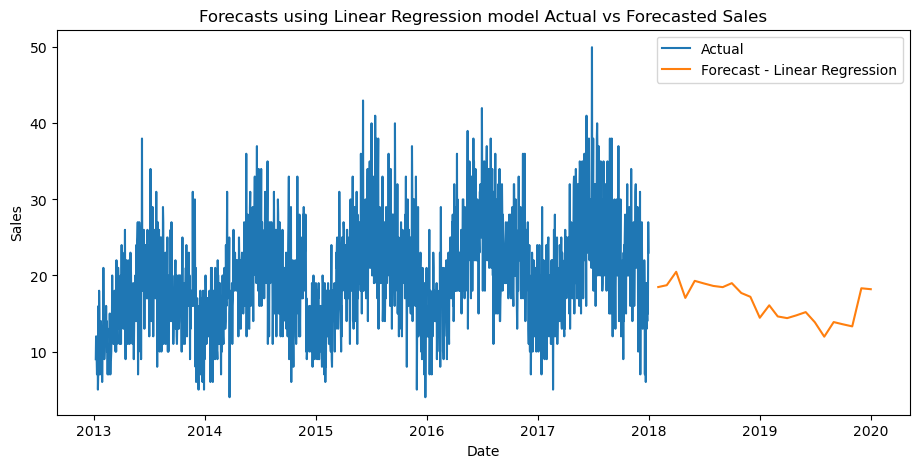

In [47]:
# Create feature variables for future periods
future_features = temp[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_1']].tail(24)  # Assuming you want to forecast 48 periods into the future (4 years)

# Make predictions for future periods
future_preds = model.predict(future_features)

# Create a date range for the forecasted periods
forecast_dates = pd.date_range(start=temp.index[-1] + pd.DateOffset(months=1), periods=len(future_preds), freq='MS')

# Create a DataFrame for the forecasted sales
forecast_df = pd.DataFrame(index=forecast_dates)
forecast_df['pred_sales'] = future_preds
forecast_df.insert(0, 'model', 'LinearRegression')

# Combine the actual sales and forecasted sales
combined_df = pd.concat([temp, forecast_df])

# Plot the actual and forecasted sales
plt.figure(figsize=(11, 5))
plt.plot(combined_df.index, combined_df['sales'], label='Actual')
plt.plot(forecast_df.index, forecast_df['pred_sales'], label='Forecast - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasts using Linear Regression model Actual vs Forecasted Sales')
plt.legend(loc='best')
plt.show()


## 5. Random Forest Model

In [48]:
# Calculate rolling statistics
whole['rolling_mean'] = whole['sales'].rolling(window=7).mean()
whole['rolling_max'] = whole['sales'].rolling(window=7).max()
whole['rolling_min'] = whole['sales'].rolling(window=7).min()
whole['lag_7'] = whole['sales'].shift(7)
whole['lag_1'] = whole['sales'].shift(1)

# Drop missing values
whole = whole.dropna()

# Split the data into features (X) and target variable (y)
X = whole[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_1']]
y = whole['sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
preds = model_rf.predict(X_test)



In [49]:
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)


Mean Squared Error: 25.21636514323871


In [50]:
# Concatenate train and test data for plotting
whole['split'] = 'train'
whole.loc[X_test.index, 'split'] = 'test'
whole['forecast'] = model_rf.predict(X)


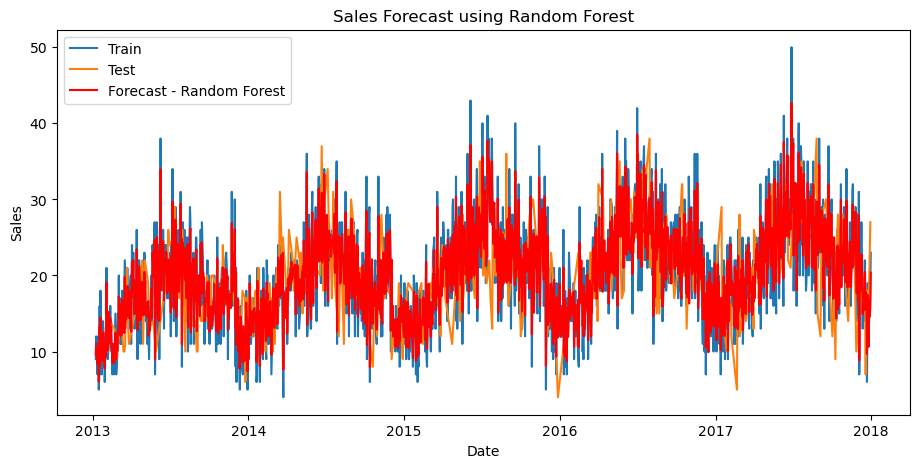

In [51]:
fig = plt.figure(figsize=(11, 5))
plt.plot(whole[whole['split'] == 'train']['date'], whole[whole['split'] == 'train']['sales'], label='Train')
plt.plot(whole[whole['split'] == 'test']['date'], whole[whole['split'] == 'test']['sales'], label='Test')
plt.plot(whole['date'], whole['forecast'], color='red', label='Forecast - Random Forest')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast using Random Forest')
plt.show()


In [52]:
errors_df = pd.DataFrame({'Actual': y_test, 'pred_sales': preds})
errors_df['errors'] = preds - y_test
errors_df.insert(0, 'model', 'RandomForest')

# Calculate additional error metrics
total_sales = errors_df['Actual'].sum()
total_pred_sales = errors_df['pred_sales'].sum()
RF_overall_error = errors_df['errors'].sum()
MAE = errors_df['errors'].abs().mean()
RMSE = mean_squared_error(errors_df['Actual'], errors_df['pred_sales'], squared=False)
MAPE = (errors_df['errors'] / errors_df['Actual']).abs().mean() * 100

# Create the result dataframe
result_df_rf = pd.DataFrame({'model': ['RandomForest'],
                            'total_sales': [total_sales],
                            'total_pred_sales': [total_pred_sales],
                            'RF_overall_error': [RF_overall_error],
                            'MAE': [MAE],
                            'RMSE': [RMSE],
                            'MAPE': [MAPE]})

print(result_df_rf)


          model  total_sales  total_pred_sales  RF_overall_error       MAE  \
0  RandomForest         7256       7416.036167        160.036167  3.910877   

      RMSE       MAPE  
0  5.02159  23.133066  
